In this example, we explore a simple CNN that attempts to represent the letters X and O

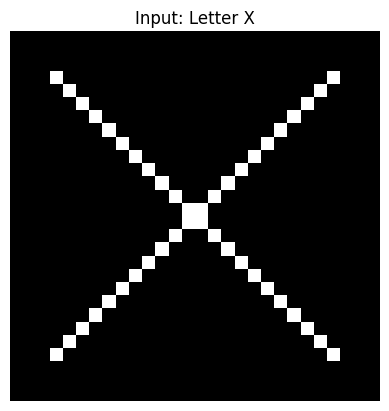

In [1]:
# First, let's generate a basic X
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import line

# Create a simple binary 'X' image
def generate_x_image(size=28):
    image = np.zeros((size, size))
    rr1, cc1 = line(3, 3, size-4, size-4)
    rr2, cc2 = line(3, size-4, size-4, 3)
    image[rr1, cc1] = 1
    image[rr2, cc2] = 1
    return image

x_image = generate_x_image()
plt.imshow(x_image, cmap='gray')
plt.title("Input: Letter X")
plt.axis('off')
plt.show()

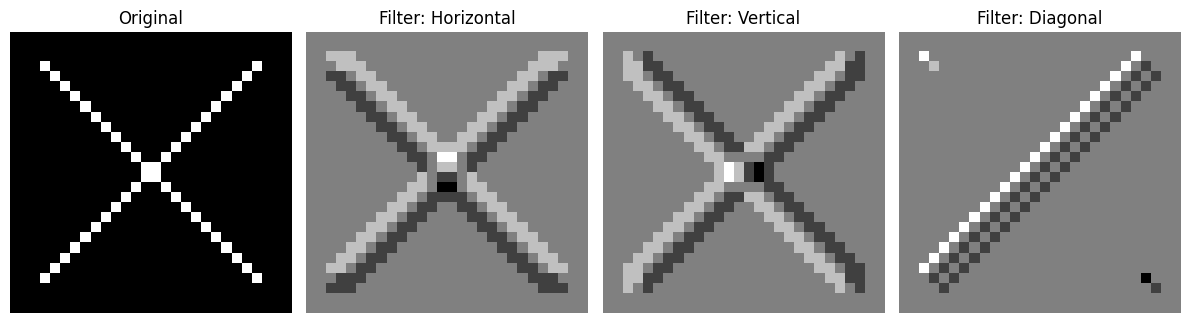

In [2]:
# Then, our CNN is going to attempt to learn the feature of that X. Instead of learning
# all features, this simple model simply attempt learn 'vertical features', 'horizontal
# features' and 'diagonal features.
from scipy.signal import convolve2d

# Example edge detection filters
filters = {
    "Horizontal": np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),
    "Vertical": np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
    "Diagonal": np.array([[2, 0, 0], [0, -1, 0], [0, 0, -1]])
}

# Plot filter outputs
fig, axes = plt.subplots(1, len(filters) + 1, figsize=(12, 4))
axes[0].imshow(x_image, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

for i, (name, f) in enumerate(filters.items()):
    conv = convolve2d(x_image, f, mode='same')
    axes[i + 1].imshow(conv, cmap='gray')
    axes[i + 1].set_title(f"Filter: {name}")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()


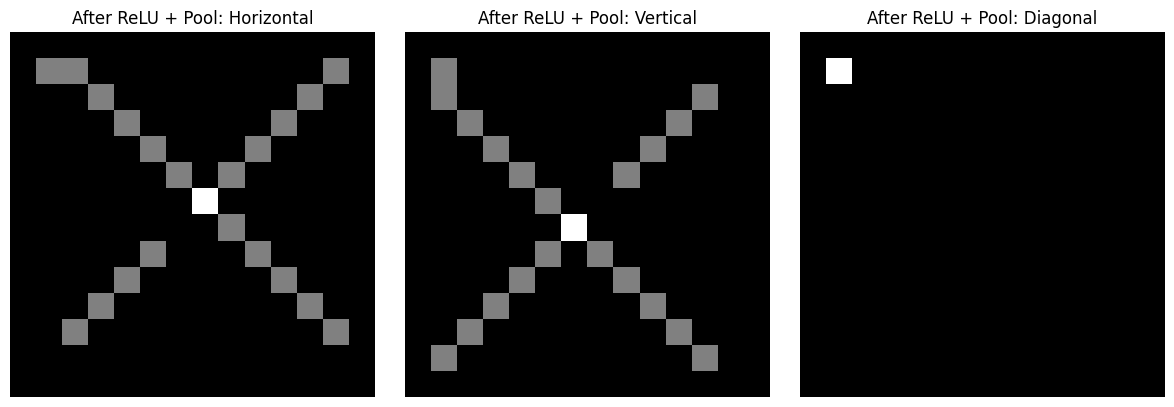

In [3]:
# During the process, we have the convolution phase shown above,
# then the ReLU and pooling phases, shown here
def relu(x):
    return np.maximum(0, x)

def max_pool(feature_map, size=2):
    pooled = feature_map[::size, ::size]
    return pooled

fig, axes = plt.subplots(1, len(filters), figsize=(12, 4))
for i, (name, f) in enumerate(filters.items()):
    conv = convolve2d(x_image, f, mode='same')
    activated = relu(conv)
    pooled = max_pool(activated)
    axes[i].imshow(pooled, cmap='gray')
    axes[i].set_title(f"After ReLU + Pool: {name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


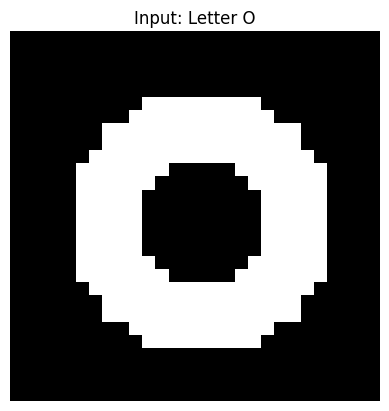

In [4]:
# Trying the same learning, with an O instead of an X
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk

def generate_o_image(size=28, radius_outer=10, radius_inner=5):
    center = (size // 2, size // 2)
    image = np.zeros((size, size))
    
    rr_outer, cc_outer = disk(center, radius_outer, shape=image.shape)
    rr_inner, cc_inner = disk(center, radius_inner, shape=image.shape)
    
    image[rr_outer, cc_outer] = 1
    image[rr_inner, cc_inner] = 0  # Hollow center
    
    return image

# Generate and display the 'O'
o_image = generate_o_image()

plt.imshow(o_image, cmap='gray')
plt.title("Input: Letter O")
plt.axis('off')
plt.show()

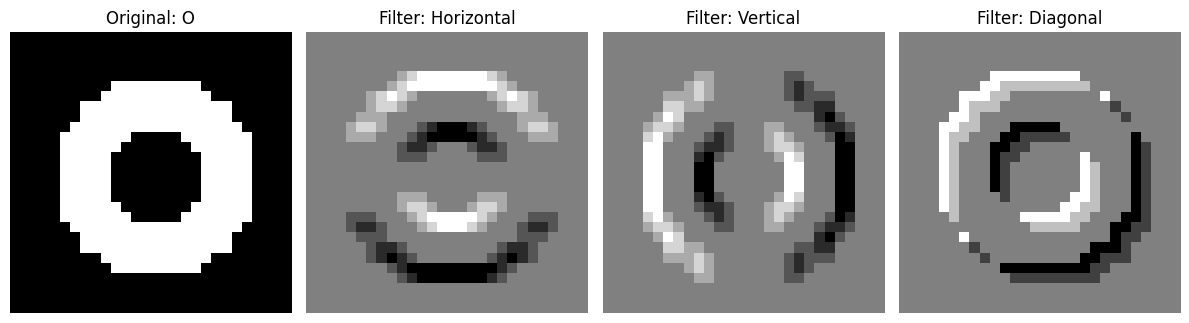

In [5]:
# Performing the vertical/horizontal/diagonal convolution
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.draw import disk

# Define convolution filters
filters = {
    "Horizontal": np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),
    "Vertical": np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
    "Diagonal": np.array([[2, 0, 0], [0, -1, 0], [0, 0, -1]])
}

# Function to generate the "O" image
def generate_o_image(size=28, radius_outer=10, radius_inner=5):
    center = (size // 2, size // 2)
    image = np.zeros((size, size))
    rr_outer, cc_outer = disk(center, radius_outer, shape=image.shape)
    rr_inner, cc_inner = disk(center, radius_inner, shape=image.shape)
    image[rr_outer, cc_outer] = 1
    image[rr_inner, cc_inner] = 0
    return image

# Generate image
o_image = generate_o_image()

# Plot original and convolutions
fig, axes = plt.subplots(1, len(filters) + 1, figsize=(12, 4))
axes[0].imshow(o_image, cmap='gray')
axes[0].set_title("Original: O")
axes[0].axis('off')

for i, (name, kernel) in enumerate(filters.items()):
    conv_result = convolve2d(o_image, kernel, mode='same')
    axes[i + 1].imshow(conv_result, cmap='gray')
    axes[i + 1].set_title(f"Filter: {name}")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

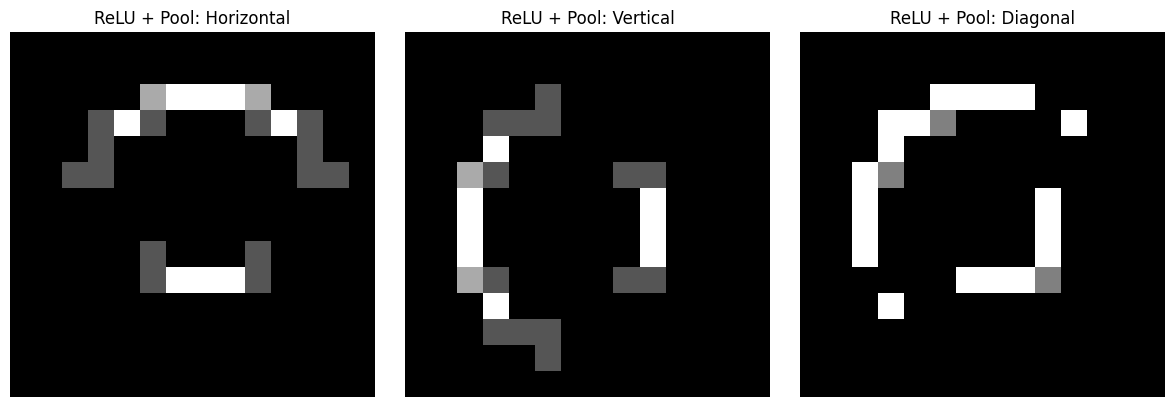

In [6]:
# And finishing with ReLU and max pooling functions
def relu(x):
    return np.maximum(0, x)

def max_pool(feature_map, size=2):
    return feature_map[::size, ::size]

# Apply and visualize
fig, axes = plt.subplots(1, len(filters), figsize=(12, 4))
for i, (name, kernel) in enumerate(filters.items()):
    conv = convolve2d(o_image, kernel, mode='same')
    activated = relu(conv)
    pooled = max_pool(activated)
    axes[i].imshow(pooled, cmap='gray')
    axes[i].set_title(f"ReLU + Pool: {name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()